## Importing required libraries

In [17]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [18]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

## Loading the Images data as batches to tensorflow dataset

**The API tf.keras.preprocessing.image_dataset_from_directory(main_directory, labels = 'inferred') will return a tf.data.Dataset that yields the batches of images from the subdirectories together with the labels.** 

#### # **tf.keras.preprocessing.image_dataset_from_directory(main_directory, labels = 'inferred') will return a tf.data.Dataset that yields the batches of images from the subdirectories together with the labels.**
tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,#alpha numerical order is used
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,(Optional random seed for shuffling and transformations.)
    validation_split=None,Optional random seed for shuffling and transformations.
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs
)**3
If labels is "inferred", it should contain subdirectories, each containing images for a class. Otherwise, the directory structure is ignored.
A tf.data.Dataset object.
If label_mode is None, it yields float32 tensors of shape (batch_size, image_size[0], image_size[1], num_channels), encoding images (see below for rules regarding num_channels).


In [20]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
            r"C:\Users\K P\OneDrive\Desktop\pythonprojectdeep\Datasets\PlantVillage",
            shuffle = True,
            image_size = (IMAGE_SIZE,IMAGE_SIZE),
            batch_size = BATCH_SIZE
)

Found 16011 files belonging to 10 classes.


**Displaying the 10 class names.**

In [21]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [32]:
class_dict = {}
count  = 0
for names in class_names:

    class_dict[names] = count
    count = count + 1
class_dict
    

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

In [33]:
len(dataset)

501

**Displaying a batch of data. It has 32 images, with each image a size of 256 by 256 and 3 is RGB channels.**

In [22]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[2 4 7 3 2 2 2 7 6 0 3 4 7 5 7 2 5 2 2 1 8 6 0 7 0 7 3 2 7 9 2 4]


**Showing the first image in the batch. The numpy array is between 0 to 255.**

In [35]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[112. 116. 115.]
  [116. 120. 119.]
  [120. 124. 123.]
  ...
  [ 71.  72.  74.]
  [ 73.  74.  78.]
  [ 74.  75.  80.]]

 [[112. 116. 115.]
  [116. 120. 119.]
  [119. 123. 122.]
  ...
  [ 72.  73.  75.]
  [ 73.  74.  78.]
  [ 75.  76.  80.]]

 [[112. 116. 115.]
  [115. 119. 118.]
  [117. 121. 120.]
  ...
  [ 76.  76.  76.]
  [ 76.  76.  78.]
  [ 77.  77.  79.]]

 ...

 [[148. 149. 144.]
  [148. 149. 144.]
  [149. 150. 145.]
  ...
  [126. 126. 116.]
  [128. 128. 118.]
  [130. 130. 120.]]

 [[146. 147. 142.]
  [146. 147. 142.]
  [146. 147. 142.]
  ...
  [124. 124. 114.]
  [124. 124. 114.]
  [130. 130. 120.]]

 [[152. 153. 148.]
  [152. 153. 148.]
  [152. 153. 148.]
  ...
  [125. 125. 115.]
  [121. 121. 111.]
  [129. 129. 119.]]]


**The shape of the first image is shown below.**

In [36]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


**Visualising 12 images from the the batch of 32 images with their class names.**

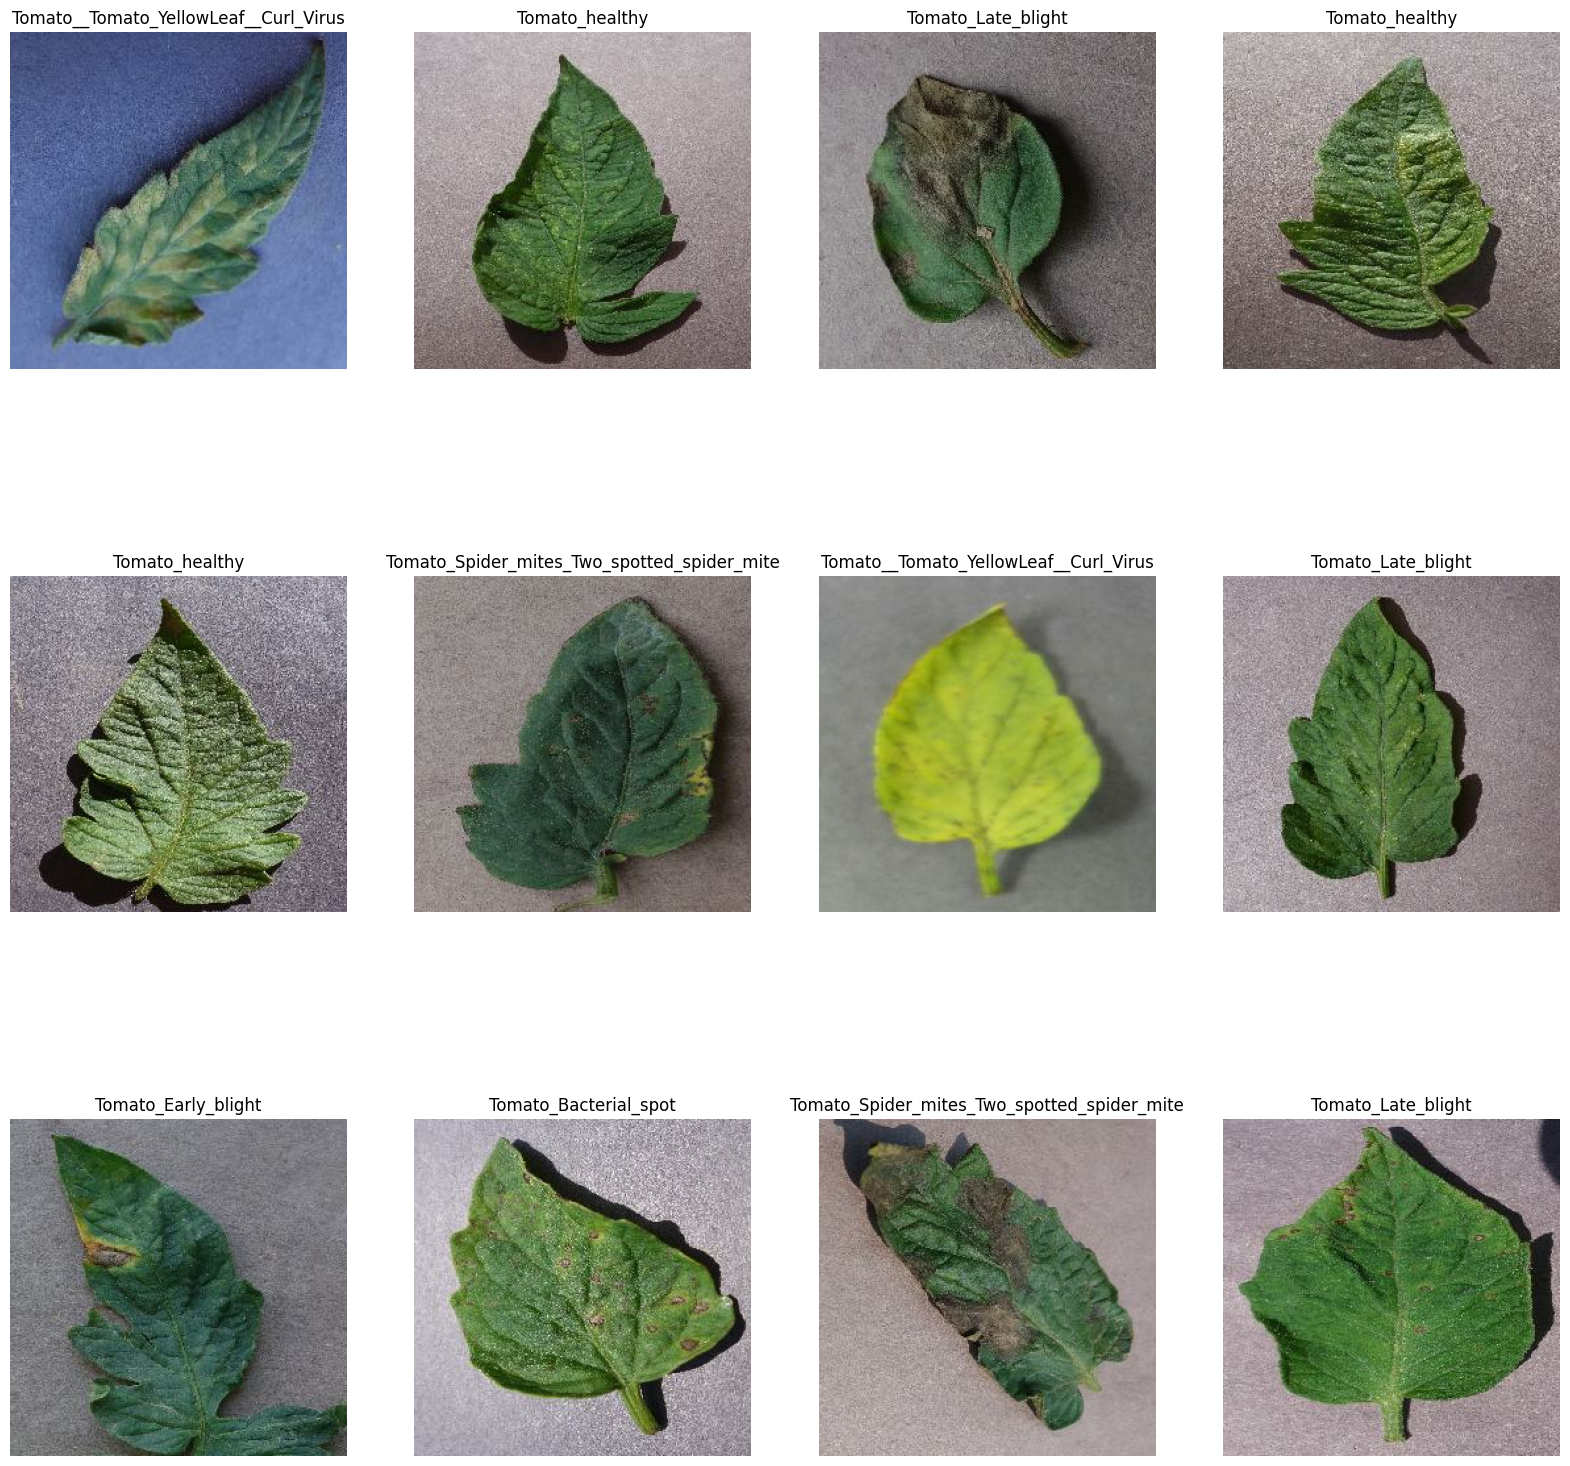

In [37]:
plt.figure(figsize=(20,20))
for image_batch, label_image in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.title(class_names[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")

## Splitting the dataset 

**Length of the dataset is 501. From this 80% of the data will be used for training, 10% of the remaining data will be used for validation and the final 10 % of the data will be used for testing the model.**

In [38]:
train_size = 0.8
len(dataset)*train_size

400.8

In [39]:
train_ds = dataset.take(400)
len(train_ds)

400

In [40]:
test_ds = dataset.skip(400)
len(test_ds)

101

In [41]:
val_size = 0.1
len(dataset)*val_size

50.1

In [42]:
val_ds = test_ds.take(50)
len(val_ds)

50

In [43]:
test_ds = test_ds.skip(50)
len(test_ds)

51

**get_dataset_partition() is a function that shuffles the dataset and splits the dataset into training, validation and testing the model.**

In [24]:
def get_dataset_partition(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size =1000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds1 = ds.take(train_size)
    val_ds1 = ds.skip(train_size).take(val_size)
    test_ds1 = ds.skip(train_size).skip(val_size)
    
    return train_ds1, val_ds1, test_ds1
    

In [25]:
train_ds, val_ds, test_ds = get_dataset_partition(dataset)

In [26]:
print("Length of training datset : ",len(train_ds))
print("Length of the validation dataset : ",len(val_ds))
print("Lenght of the test dataset : ",len(test_ds))


Length of training datset :  400
Length of the validation dataset :  50
Lenght of the test dataset :  51


### Cache, Shuffle and Prefetch the dataset 

**cache() function here reads the image from the disk and stores in the memory. The next iteration will reuse the images cached during the cache transformation.**

**prefetch() function is used to decouple the time when data is produced from the time when data is consumed. The transformation uses a background thread and an internal buffer to prefetch elements from the input dataset ahead of the time they are requested.**

**AUTOTUNE, which will prompt the tf. data runtime to tune the value dynamically at runtime.**

In [47]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

## Scaling the Image 

In [48]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

## Data Augmentation

In [49]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

### Applying Data Augmentation to Train Dataset

In [50]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

## Model Building using Convolutional Neural Network (CNN) 

**Using a CNN coupled with a Softmax activation in the output layer. Also added resizing, normalization and Data Augmentation as the initial layers.**

In [51]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])

model.build(input_shape = input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

### Compiling the Model

**Using adam Optimizer, SparseCategoricalCrossentropy for losses and accuracy as a metric.**

In [25]:
model.compile(
        optimizer = 'adam',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
        metrics = ['accuracy']
)

In [26]:
history = model.fit(
        train_ds,
        epochs = EPOCHS,
        batch_size = BATCH_SIZE,
        verbose = 1,
        validation_data = val_ds
)

Epoch 1/50
400/400 [==============================] - 879s 2s/step - loss: 1.7186 - accuracy: 0.3812 - val_loss: 1.4993 - val_accuracy: 0.4481
Epoch 2/50
400/400 [==============================] - 766s 2s/step - loss: 1.2104 - accuracy: 0.5803 - val_loss: 1.3222 - val_accuracy: 0.5581
Epoch 3/50
400/400 [==============================] - 717s 2s/step - loss: 0.9120 - accuracy: 0.6865 - val_loss: 1.5688 - val_accuracy: 0.5525
Epoch 4/50
400/400 [==============================] - 713s 2s/step - loss: 0.7329 - accuracy: 0.7370 - val_loss: 0.8907 - val_accuracy: 0.6800
Epoch 5/50
400/400 [==============================] - 708s 2s/step - loss: 0.5918 - accuracy: 0.7930 - val_loss: 0.8178 - val_accuracy: 0.7525
Epoch 6/50
400/400 [==============================] - 699s 2s/step - loss: 0.5198 - accuracy: 0.8203 - val_loss: 1.3854 - val_accuracy: 0.6025
Epoch 7/50
400/400 [==============================] - 694s 2s/step - loss: 0.4368 - accuracy: 0.8507 - val_loss: 0.7208 - val_accuracy: 0.7619

In [29]:
scores = model.evaluate(test_ds)

51/51 [==============================] - 18s 359ms/step - loss: 0.1210 - accuracy: 0.9609


In [30]:
scores

[0.12095198780298233, 0.9608938694000244]

### The training accuracy is 0.97 and the testing accuracy is 0.96

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plotting the Accuracy and Loss for both Training and Validation

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

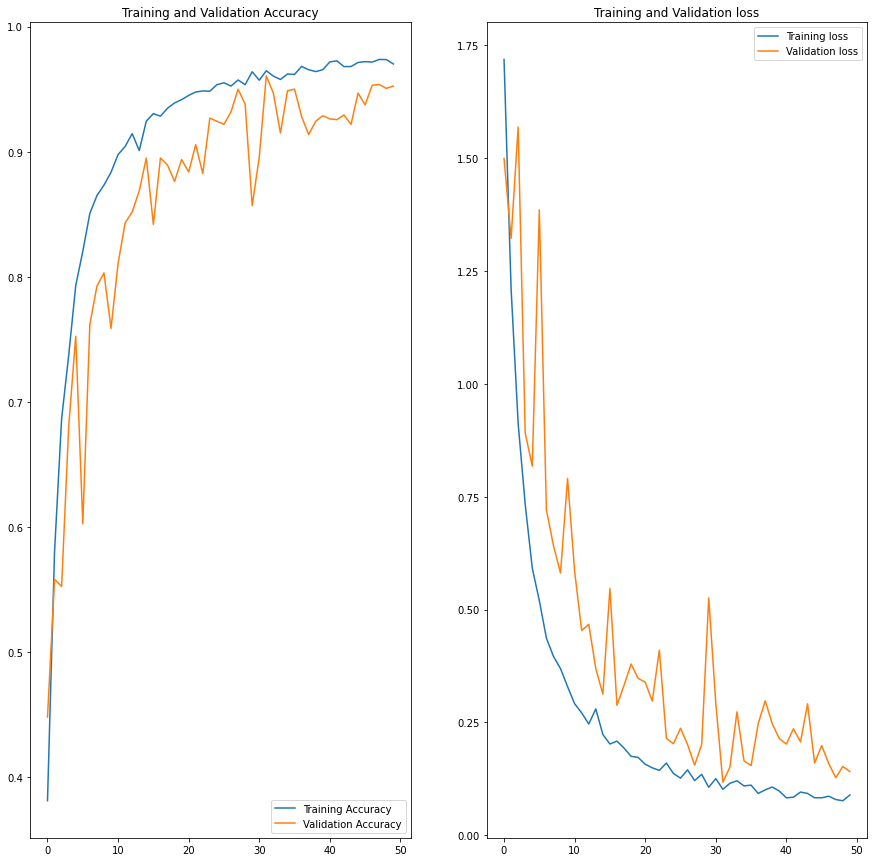

In [45]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label= 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = 'Training loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation loss')
plt.show()

### The above Training and Validation Accuracy graph shows that with the increase in the Training accuracy there is a increase in the Validation accuracy.

### From the Training and the Validation loss graph, it shows that with the decrease in the training loss there is a decrease in the validation loss.

### Predicting an image

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("Actual label : ", class_names[first_label])
    plt.imshow(first_image)
    
    batch_prediction = model.predict(images_batch)
    print("Predicted label : ", class_names[np.argmax(batch_prediction[0])])

**predict() function is used to predict the images and it provides the Predicted class name with the Confidence.**

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(20,20))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual class : {actual_class},\n Predicted : {predicted_class}, \n Confidence : {confidence}%")
        plt.axis("off")

**The output clearly shows that the model is able to predict all the images correctly and the model performanace is significant.** 

## Saving the model and the Class names

In [51]:
model.save('saved_model.h5')

In [46]:
import json
with open("class_names.json","w") as f:
    f.write(json.dumps(class_dict))
    

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

In [5]:
reloaded_model = tf.keras.models.load_model('saved_model.h5')

In [8]:
class_names=['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

(-0.5, 255.5, 255.5, -0.5)

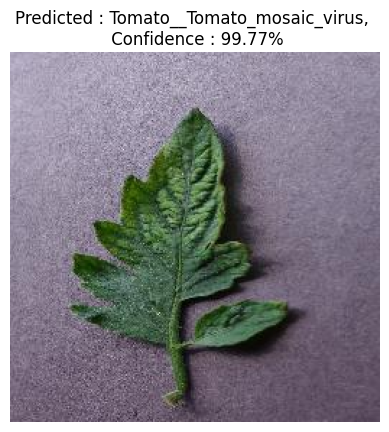

In [24]:

image_path=r"C:\Users\K P\OneDrive\Desktop\pythonprojectdeep\Datasets\PlantVillage\Tomato__Tomato_mosaic_virus\000ec6ea-9063-4c33-8abe-d58ca8a88878___PSU_CG 2169.JPG"
test_image=image.load_img(image_path,target_size=(256,256))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = reloaded_model.predict(test_image,batch_size=32)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = round(100 * (np.max(predictions[0])), 2)

plt.title(f"Predicted : {predicted_class}, \n Confidence : {confidence}%")
plt.axis("off")

In [55]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

In [56]:
reloaded_model = tf.keras.models.load_model('saved_model.h5')

In [57]:
test_images = tf.keras.preprocessing.image_dataset_from_directory(
            r"C:\Users\K P\OneDrive\Desktop\pythonprojectdeep\Datasets\tomato",
            shuffle = True,
            image_size = (256,256),
            batch_size = 32
)

Found 584 files belonging to 6 classes.


Actual label :  Tomato_Late_blight
Predicted label :  Tomato_Late_blight


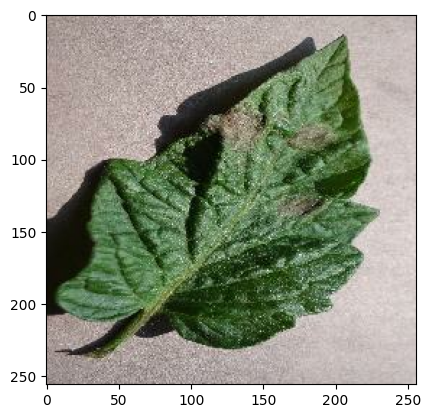

In [11]:
import numpy as np
for images_batch, labels_batch in test_images.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("Actual label : ", class_names[first_label])
    plt.imshow(first_image)
    
    batch_prediction = reloaded_model.predict(images_batch)
    print("Predicted label : ", class_names[np.argmax(batch_prediction[0])])

In [1]:
!pip install streamlit

     ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.6 MB 131.3 kB/s eta 0:01:13
     ---------------------------------------- 0.0/9.6 MB 131.3 kB/s eta 0:01:13
     ---------------------------------------- 0.0/9.6 MB 115.5 kB/s eta 0:01:23
     ---------------------------------------- 0.0/


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install scikit-image

^C


In [14]:
!pip install pyngrok

     ---------------------------------------- 0.0/761.3 kB ? eta -:--:--
      --------------------------------------- 10.2/761.3 kB ? eta -:--:--
      --------------------------------------- 10.2/761.3 kB ? eta -:--:--
      --------------------------------------- 10.2/761.3 kB ? eta -:--:--
      --------------------------------------- 10.2/761.3 kB ? eta -:--:--
     - ----------------------------------- 41.0/761.3 kB 151.3 kB/s eta 0:00:05
     - ----------------------------------- 41.0/761.3 kB 151.3 kB/s eta 0:00:05
     - ----------------------------------- 41.0/761.3 kB 151.3 kB/s eta 0:00:05
     --- --------------------------------- 81.9/761.3 kB 209.0 kB/s eta 0:00:04
     --- --------------------------------- 81.9/761.3 kB 209.0 kB/s eta 0:00:04
     ----- ------------------------------ 112.6/761.3 kB 243.2 kB/s eta 0:00:03
     ----- ------------------------------ 122.9/761.3 kB 232.7 kB/s eta 0:00:03
     ------- ---------------------------- 163.8/761.3 kB 281.3 kB/s eta


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from pyngrok import ngrok

In [34]:
%%writefile tomatoDL.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import pickle
from PIL import Image
st.set_option('deprecation.showfileUploaderEncoding', False)
st.title('Image classifier Deep learning')
st.text('Upload the Image')
class_names=['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']
reloaded_model = tf.keras.models.load_model('saved_model.h5')
uploaded_file = st.file_uploader("Choose an Image...",type='JPG')
if uploaded_file is not None:
    img=Image.open(uploaded_file)
    st.image(img,caption='Uploaded Image')
    
    if st.button('PREDICT'):
        st.write('Result..')
        #test_image=image.load_img(img,target_size=(256,256))
        test_image = image.img_to_array(img)
        test_image = np.expand_dims(test_image, axis = 0)
        prediction = reloaded_model.predict(test_image,batch_size=32)
        st.write("Predicted label : ", class_names[np.argmax(prediction[0])])
        confidence = round(100 * (np.max(prediction[0])), 2)
        st.write('Confidence : ',confidence)

Overwriting tomatoDL.py


In [ ]:
!streamlit run tomatoDL.py

In [1]:
#test_image=image.load_img(img,target_size=(256,256))

In [4]:
!pip install scikit-learn

     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB 682.7 kB/s eta 0:00:13
     ---------------------------------------- 0.0/8.3 MB 682.7 kB/s eta 0:00:13
     ---------------------------------------- 0.1/8.3 MB 292.6 kB/s eta 0:00:29
     ---------------------------------------- 0.1/8.3 MB 273.8 kB/s eta 0:00:31
     ---------------------------------------- 0.1/8.3 MB 281.8 kB/s eta 0:00:30
     ---------------------------------------- 0.1/8.3 MB 281.8 kB/s eta 0:00:30
     ---------------------------------------- 0.1/8.3 MB 276.8 kB/s eta 0:00:30
     ---------------------------------------- 0.1/8.3 MB 268.7 kB/s eta 0:00:31
      --------------------------------------- 0.1/8.3 MB 288.8 kB/s eta 0:00:29
      --------------------------------------- 0.2/8.3 MB 316.5 kB/s eta 0:00:26
      --------------------------------------- 0.2/8.3 MB 3


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt


In [30]:
# Load test data and true labels
#test_data = r"C:\Users\K P\OneDrive\Desktop\pythonprojectdeep\Datasets\test images"# load your test data here
true_labels = ['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']